<a href="https://colab.research.google.com/github/shubham3032002/Cifar10-dataset-classification-project/blob/main/Cifar10_dataset_classification_project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
(X_train,y_train),(X_test,y_test) =tf.keras.datasets.cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Class distribution: {np.unique(y_train, return_counts=True)}")

Training shape: (50000, 32, 32, 3), Test shape: (10000, 32, 32, 3)
Class distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


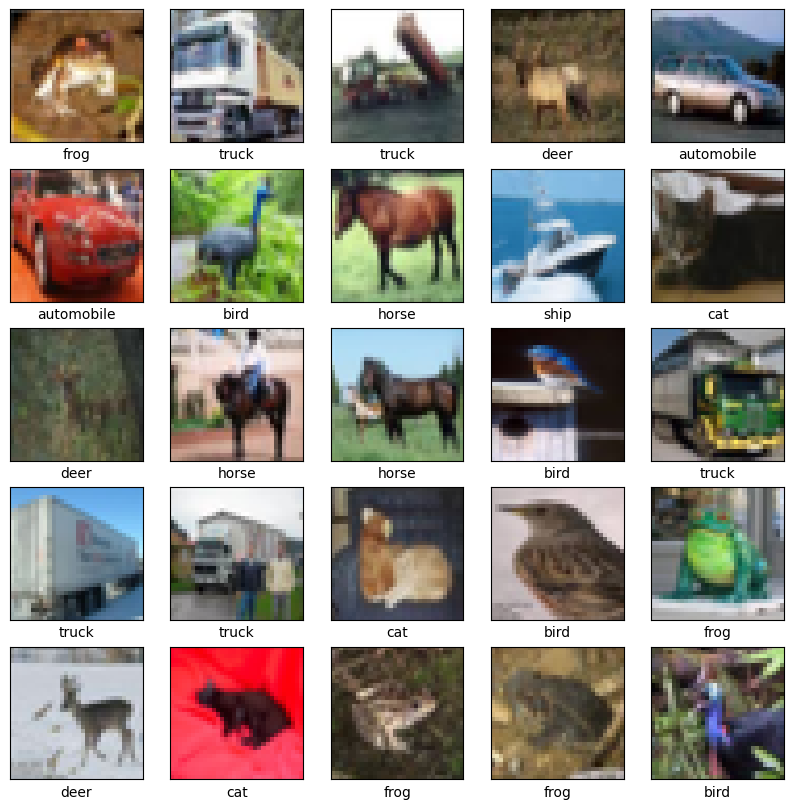

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
def preprocess_Data(X,y):
  X=X.astype('float32') /255.0

  y=to_categorical(y,num_classes=10)

  return X,y

In [ ]:
X_train, y_train = preprocess_Data(X_train, y_train)
X_test, y_test = preprocess_Data(X_test, y_test)

In [ ]:
# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1
)


In [ ]:
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=128)

In [ ]:
def create_model():
  model=models.Sequential([
      # Data augmentation layers
      layers.RandomRotation(0.01,input_shape=(32,32,3)),
      layers.RandomZoom(0.1),
      layers.RandomFlip('horizontal'),

      # Convolutional Base
      layers.Conv2D(64,(3,3),activation='relu',padding='same',
                    kernel_regularizer=regularizers.l2(1e-4)),
      layers.BatchNormalization(),
      layers.Conv2D(64, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D(2,2),
      layers.Dropout(0.3),

      layers.Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.Conv2D(128, (3,3), activation='relu', padding='same'),
      layers.MaxPooling2D(2,2),
      layers.Dropout(0.4),


      layers.Conv2D(256, (3,3), activation='relu', padding='same'),
      layers.BatchNormalization(),
      layers.MaxPooling2D(2,2),
      layers.Dropout(0.5),

      # Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])


  lr_schedule =optimizers.schedules.ExponentialDecay(
      initial_learning_rate=1e-3,
      decay_steps=10000,
      decay_rate=0.9
  )
  optimizer = optimizers.Adam(learning_rate=lr_schedule)

  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy',
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')])
  return model




In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_rotation_2 (RandomRotation)   │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_2 (RandomZoom)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_2 (RandomFlip)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,0

 Total params: 2,661,962 (10.15 MB)

 Trainable params: 2,660,042 (10.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True)

checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras', save_best_only=True, monitor='val_accuracy')

# reduce_lr = callbacks.ReduceLROnPlateau(
#     monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [ ]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train)//128,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 35s 103ms/step - accuracy: 0.7286 - loss: 0.9417 - precision: 0.8140 - recall: 0.6493 - val_accuracy: 0.7358 - val_loss: 0.9508 - val_precision: 0.7955 - val_recall: 0.6914
Epoch 2/40
  1/312 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7344 - loss: 0.9303 - precision: 0.8351 - recall: 0.6328

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7344 - loss: 0.9303 - precision: 0.8351 - recall: 0.6328 - val_accuracy: 0.6327 - val_loss: 1.3194 - val_precision: 0.6948 - val_recall: 0.5923
Epoch 3/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.7411 - loss: 0.9197 - precision: 0.8199 - recall: 0.6655 - val_accuracy: 0.6678 - val_loss: 1.2180 - val_precision: 0.7129 - val_recall: 0.6270
Epoch 4/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7188 - loss: 0.9142 - precision: 0.7946 - recall: 0.6953 - val_accuracy: 0.6750 - val_loss: 1.1848 - val_precision: 0.7225 - val_recall: 0.6337
Epoch 5/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.7428 - loss: 0.9157 - precision: 0.8205 - recall: 0.6702 - val_accuracy: 0.7737 - val_loss: 0.8500 - val_precision: 0.8388 - val_recall: 0.7227
Epoch 6/40
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6797 - loss: 1.0747 - precision: 0.7500 - recall: 0.5859 - val_accuracy: 0.7706 - val_loss: 0.8567 -

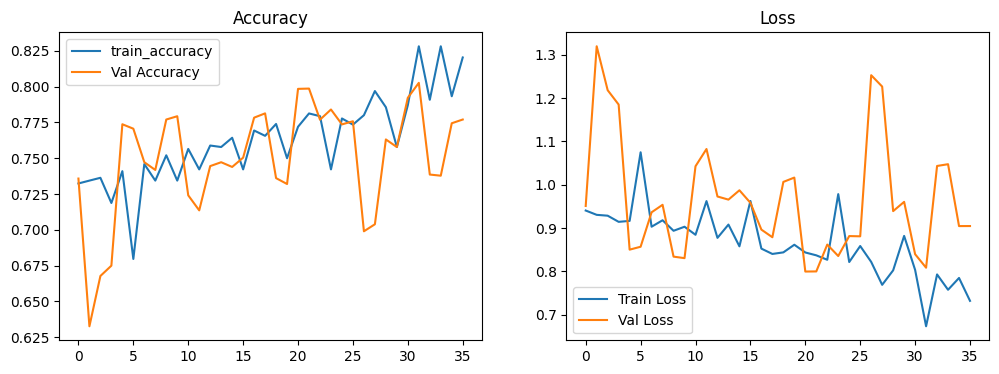

In [ ]:
def plot_history(history):
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'],label='train_accuracy')
  plt.plot(history.history['val_accuracy'], label='Val Accuracy')
  plt.title('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title('Loss')
  plt.legend()

  plt.show()


plot_history(history)


In [ ]:
# Load best model
model = models.load_model('best_model.keras')


In [ ]:
test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7930 - loss: 0.8368 - precision: 0.8296 - recall: 0.7537
Test Accuracy: 0.7867
Test Precision: 0.8259
Test Recall: 0.7523


In [ ]:
# Classification Report and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step



Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.87      0.82      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.81      0.67      0.73      1000
         cat       0.76      0.56      0.64      1000
        deer       0.76      0.72      0.74      1000
         dog       0.89      0.54      0.67      1000
        frog       0.53      0.97      0.68      1000
       horse       0.88      0.80      0.84      1000
        ship       0.91      0.89      0.90      1000
       truck       0.89      0.92      0.91      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000



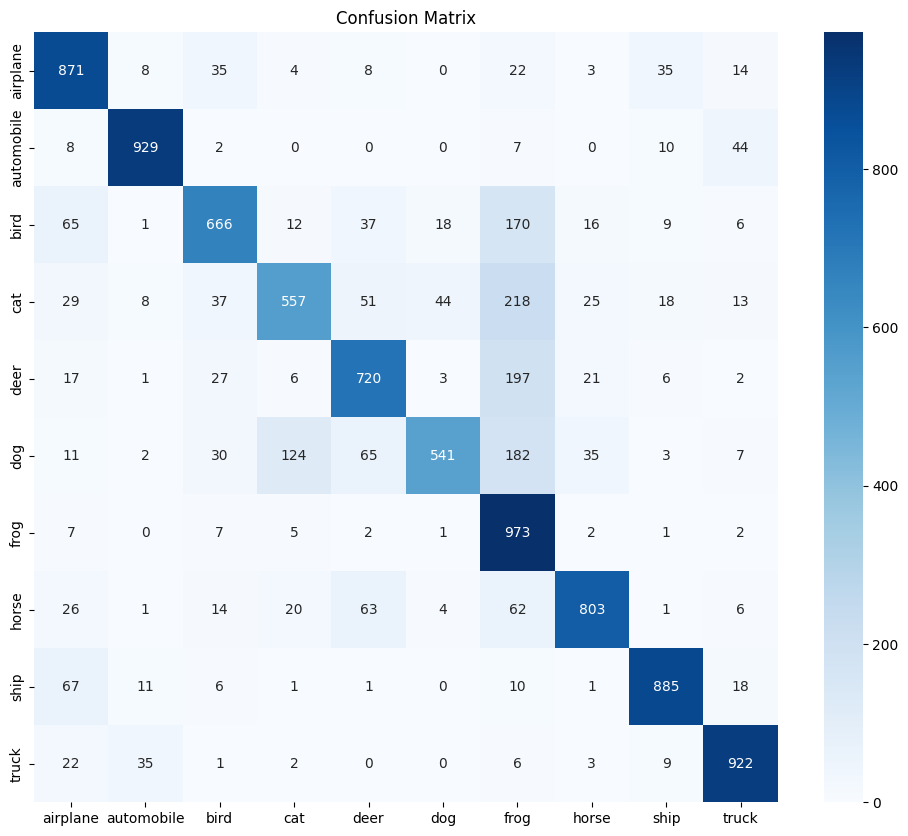

In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_true, y_pred_classes),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.show()

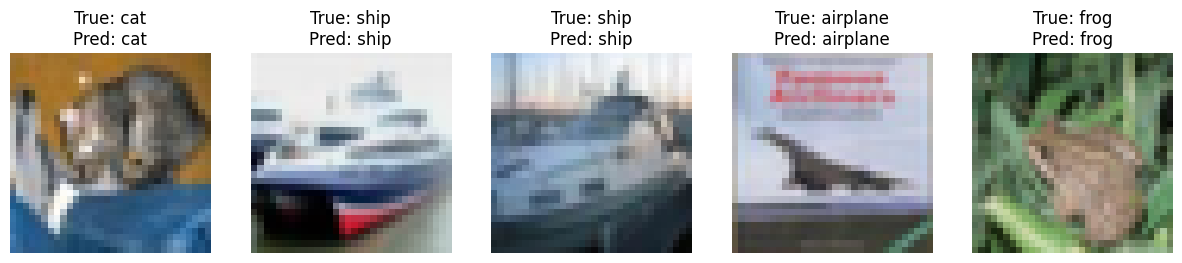

In [ ]:
def plot_predictions(images, true_labels, pred_labels, n=5):
    plt.figure(figsize=(15,5))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[pred_labels[i]]}")
        plt.axis('off')
    plt.show()

# Convert back to 0-255 scale for plotting
X_test_denorm = (X_test * 255).astype('uint8')
plot_predictions(X_test_denorm[:5], y_true[:5], y_pred_classes[:5])

# Save Final Model
model.save('cifar10_cnn_final.keras')